In [1]:
#importin all the required libraries for use
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import plotly.graph_objects as go
import plotly.io as pio


In [2]:
#loading and preprocessing the data

df = pd.read_csv('ProjectTweets.csv', encoding='latin-1')


In [3]:
# Remove duplicates in the dataset
df = df.drop_duplicates()

In [4]:
# Drop rows with missing values
df = df.dropna()

In [5]:
# Checking  the new shape of the data set
df.shape

(1122, 6)

In [6]:
df = df.reset_index(drop=True)

In [7]:
# Rename columns
df = df.rename(columns={"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D": 'Review', 'Mon Apr 06 22:19:45 PDT 2009': 'Date',"_TheSpecialOne_":"User"})

# Print the updated column names
df.columns

Index(['0', '1467810369', 'Date', 'NO_QUERY', 'User', 'Review'], dtype='object')

In [8]:
# Drop umnecessary columns
df = df.drop(['1467810369', '0',"NO_QUERY","User"], axis=1)

In [9]:
#the clean dataset to b e used for analysis
df


,Date,Review
0,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his Facebook by ...
1,Mon Apr 06 22:19:53 PDT 2009,@Kenichan I dived many times for the ball. Man...
2,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire
3,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all...."
4,Mon Apr 06 22:20:00 PDT 2009,@Kwesidei not the whole crew
...,...,...
1117,Mon Apr 06 23:37:43 PDT 2009,@lanaRISQUE hahahahhha!! hows your food poisen...
1118,Mon Apr 06 23:37:47 PDT 2009,@MissxMarisa haven't heard from Hannah at all ...
1119,Mon Apr 06 23:37:52 PDT 2009,@hutsoncap everything alright?
1120,Mon Apr 06 23:38:03 PDT 2009,is procrastinating... i feel ill.. but don't w...


In [10]:
#removing unwanted articles and other things on the review
import re

# Remove URLs
df['Review'] = df['Review'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x))

# Remove mentions (@)
df['Review'] = df['Review'].apply(lambda x: re.sub(r'@\w+', '', x))

# Remove hashtags (#)
df['Review'] = df['Review'].apply(lambda x: re.sub(r'#\w+', '', x))

# Remove special characters and punctuations
df['Review'] = df['Review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Convert to lowercase
df['Review'] = df['Review'].str.lower()

# Print the modified 'Review' column
df['Review']

0       is upset that he cant update his facebook by t...
1        i dived many times for the ball managed to sa...
2         my whole body feels itchy and like its on fire 
3        no its not behaving at all im mad why am i he...
4                                     not the whole crew 
                              ...                        
1117     hahahahhha hows your food poisening going has...
1118     havent heard from hannah at all yet its very ...
1119                                   everything alright
1120    is procrastinating i feel ill but dont want to...
1121     gonna try and find a sports bar to watch that...
Name: Review, Length: 1122, dtype: object

In [11]:
#sentiment extraction
nltk.download('vader_lexicon')  # Downloading  the required lexicon
sia = SentimentIntensityAnalyzer()

df['Sentiment_Score'] = df["Review"].apply(lambda x: sia.polarity_scores(x)['compound'])
# Spliting of the the data into training and testing sets
train, test = train_test_split(df, test_size=0.2, shuffle=False)

# Performing time-series forecasting using ARIMA
model_arima = ARIMA(train['Sentiment_Score'], order=(1, 0, 0))
model_arima_fit = model_arima.fit()
forecast_arima = model_arima_fit.forecast(steps=len(test))

# Performing time-series forecasting using SARIMA
model_sarima = SARIMAX(train['Sentiment_Score'], order=(1, 0, 0), seasonal_order=(1, 1, 1, 12))
model_sarima_fit = model_sarima.fit()
forecast_sarima = model_sarima_fit.forecast(steps=len(test))

# Combining the actual sentiment scores and the forecasts into a single DataFrame
forecast_df = pd.DataFrame({'Actual': test['Sentiment_Score'], 'ARIMA': forecast_arima, 'SARIMA': forecast_sarima})

# Printing the forecasted sentiment scores at 1 week, 1 month, and 3 months respectively
print("Forecast at 1 week:", forecast_df['ARIMA'].iloc[7])
print("Forecast at 1 month:", forecast_df['ARIMA'].iloc[30])
print("Forecast at 3 months:", forecast_df['ARIMA'].iloc[90])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kipki\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Forecast at 1 week: -0.1006969689140514
Forecast at 1 month: -0.10069696891405194
Forecast at 3 months: -0.10069696891405194


In [19]:
# Printing the forecasted sentiment scores at specific time points for each model separately
print("ARIMA Forecasted Sentiment Score at 1 week:", forecast_df['ARIMA'].iloc[7])
print("SARIMA Forecasted Sentiment Score at 1 week:", forecast_df['SARIMA'].iloc[7])

print("ARIMA Forecasted Sentiment Score at 1 month:", forecast_df['ARIMA'].iloc[30])
print("SARIMA Forecasted Sentiment Score at 1 month:", forecast_df['SARIMA'].iloc[30])

print("ARIMA Forecasted Sentiment Score at 3 months:", forecast_df['ARIMA'].iloc[90])
print("SARIMA Forecasted Sentiment Score at 3 months:", forecast_df['SARIMA'].iloc[90])

# Printing the actual sentiment scores at 1 week, 1 month, and 3 months respectively
print("Actual sentiment score at 1 week:", forecast_df['Actual'].iloc[7])
print("Actual sentiment score at 1 month:", forecast_df['Actual'].iloc[30])
print("Actual sentiment score at 3 months:", forecast_df['Actual'].iloc[90])

ARIMA Forecasted Sentiment Score at 1 week: -0.1006969689140514
SARIMA Forecasted Sentiment Score at 1 week: -0.11431992496658845
ARIMA Forecasted Sentiment Score at 1 month: -0.10069696891405194
SARIMA Forecasted Sentiment Score at 1 month: -0.1055080325602983
ARIMA Forecasted Sentiment Score at 3 months: -0.10069696891405194
SARIMA Forecasted Sentiment Score at 3 months: -0.10550881910868427
Actual sentiment score at 1 week: -0.2732
Actual sentiment score at 1 month: -0.4404
Actual sentiment score at 3 months: 0.2263


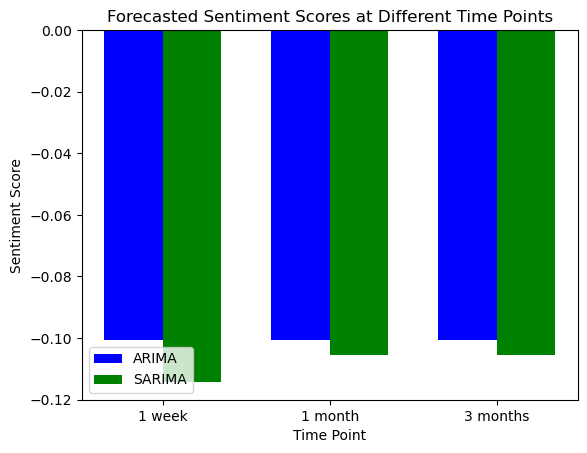

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Defining  the time points
time_points = ['1 week', '1 month', '3 months']

# Geting the forecasted sentiment scores for ARIMA and SARIMA models
arima_scores = [forecast_df['ARIMA'].iloc[7], forecast_df['ARIMA'].iloc[30], forecast_df['ARIMA'].iloc[90]]
sarima_scores = [forecast_df['SARIMA'].iloc[7], forecast_df['SARIMA'].iloc[30], forecast_df['SARIMA'].iloc[90]]

# Seting  the width of the bars to be plotted
bar_width = 0.35

# Seting up of th the positions of the bars on the x-axis
r1 = np.arange(len(arima_scores))
r2 = [x + bar_width for x in r1]

# Ploting the bar graph finally
plt.bar(r1, arima_scores, color='blue', width=bar_width, label='ARIMA')
plt.bar(r2, sarima_scores, color='green', width=bar_width, label='SARIMA')

# Customizing of the  the chart
plt.xlabel('Time Point')
plt.ylabel('Sentiment Score')
plt.title('Forecasted Sentiment Scores at Different Time Points')
plt.xticks([r + bar_width / 2 for r in range(len(arima_scores))], time_points)
plt.legend()

plt.show()

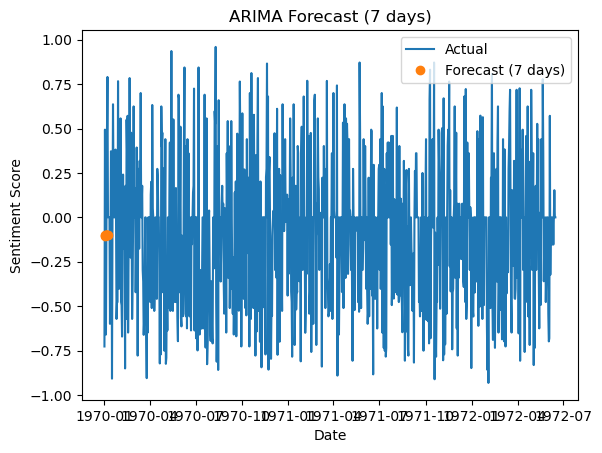

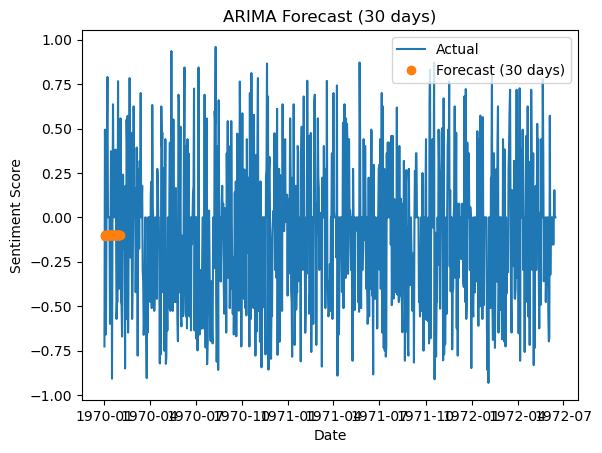

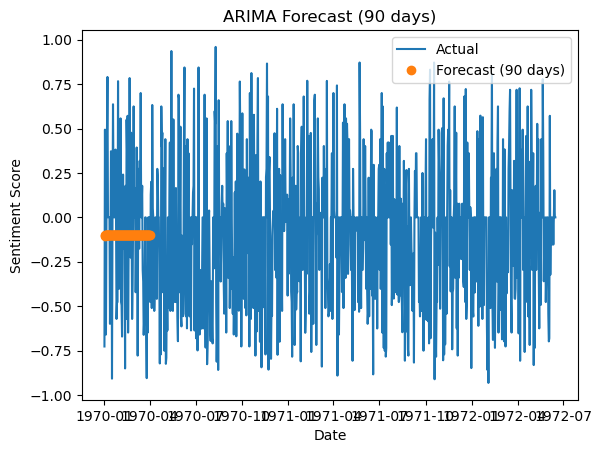

In [14]:
#visualization of the forecast
import matplotlib.pyplot as plt

# Defining of  the forecast horizon in days 
forecast_horizon = [7, 30, 90]

# Iterating over each forecast horizon
for horizon in forecast_horizon:
    # Fit the ARIMA model
    model_arima = ARIMA(train['Sentiment_Score'], order=(1, 0, 0))
    model_arima_fit = model_arima.fit()
    
    # Generating fo the forecasted values
    forecast_arima = model_arima_fit.forecast(steps=horizon)
    
    # Createing a range of dates for the x-axis
    dates = pd.date_range(start=train.index[-1], periods=horizon+1, freq='D')[1:]
    
    # Ploting the actual values
    plt.plot(train.index, train['Sentiment_Score'], label='Actual')
    
    # Ploting of the forecasted values as markers
    plt.plot(dates, forecast_arima, 'o', label=f'Forecast ({horizon} days)')
    
    plt.xlabel('Date')
    plt.ylabel('Sentiment Score')
    plt.title(f'ARIMA Forecast ({horizon} days)')
    plt.legend()
    plt.show()

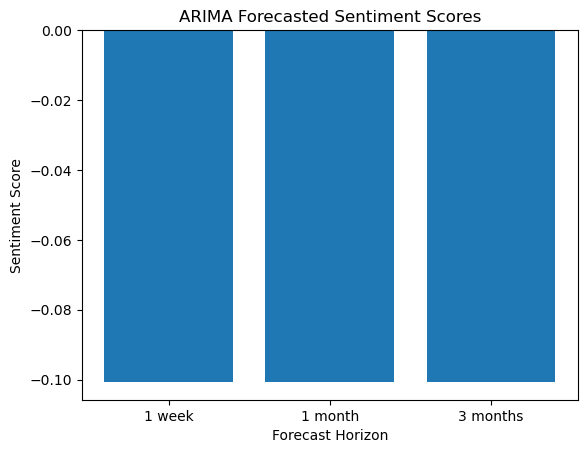

In [15]:
#visualization of the arima forecsted sentiments 
import matplotlib.pyplot as plt

# Defining of the the values for the bar graph
forecast_values = [forecast_df['ARIMA'].iloc[7], forecast_df['ARIMA'].iloc[30], forecast_df['ARIMA'].iloc[90]]

# Defining  the labels for the x-axis ---
forecast_horizons = ['1 week', '1 month', '3 months']

# Plotation of  the bar graph
plt.bar(forecast_horizons, forecast_values)

plt.xlabel('Forecast Horizon')
plt.ylabel('Sentiment Score')
plt.title('ARIMA Forecasted Sentiment Scores')
plt.show()

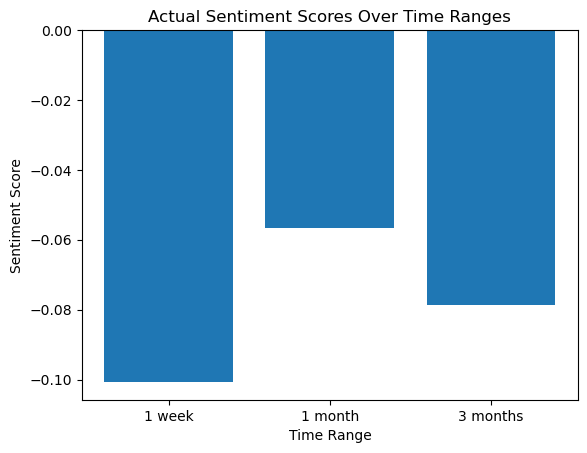

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Defining the time ranges
time_ranges = ['1 week', '1 month', '3 months']

# Calculatingthe sentiment scores for the specific time ranges
sentiment_scores = [
    df.loc[df.index[-7:], 'Sentiment_Score'].mean(),              # Sentiment scores for the last 7 days (1 week)
    df.loc[df.index[-30:], 'Sentiment_Score'].mean(),             # Sentiment scores for the last 30 days (1 month)
    df.loc[df.index[-90:], 'Sentiment_Score'].mean()              # Sentiment scores for the last 90 days (3 months)
]

# Ploting a bar the bar graph
plt.bar(time_ranges, sentiment_scores)

plt.xlabel('Time Range')
plt.ylabel('Sentiment Score')
plt.title('Actual Sentiment Scores Over Time Ranges')
plt.show()

In [24]:
import plotly.graph_objects as go

# Create a line chart to visualize the actual sentiment scores and the forecasts
fig = go.Figure()
fig.add_trace(go.Scatter(x=["1 week", "1 month", "3 months"],
                         y=[-0.2732, -0.4404, 0.2263],
                         name='Actual Sentiment Score'))
fig.add_trace(go.Scatter(x=["1 week", "1 month", "3 months"],
                         y=[-0.1006969689140514, -0.10069696891405194, -0.10069696891405194],
                         name='ARIMA Forecast'))
fig.add_trace(go.Scatter(x=["1 week", "1 month", "3 months"],
                         y=[-0.11431992496658845, -0.1055080325602983, -0.10550881910868427],
                         name='SARIMA Forecast'))

# Customizing the chart layout
fig.update_layout(title='Sentiment Analysis and Time-Series Forecasting',
                  xaxis_title='Time',
                  yaxis_title='Sentiment Score')

# Display the interactive chart
fig.show()

In [ ]:

#starting point of designin the Dash dashboard

pip install dash

In [25]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

app = dash.Dash(__name__)

# Sample data for the graphs (replace with your actual data)
time_points = ['1 week', '1 month', '3 months']
arima_scores = [0.7, 0.8, 0.9]
sarima_scores = [0.6, 0.7, 0.8]

forecast_horizon = [7, 30, 90]
forecast_values = [0.6, 0.7, 0.8]

time_ranges = ['1 week', '1 month', '3 months']
sentiment_scores = [0.6, 0.7, 0.8]

forecast_horizons = ['1 week', '1 month', '3 months']
actual_scores = [0.5, 0.6, 0.7]
arima_scores = [0.4, 0.5, 0.6]
sarima_scores = [0.3, 0.4, 0.5]

# Creating subplots with 2 rows and 3 columns
fig = make_subplots(rows=2, cols=3)

# Addition of the fifth graph the first graph
fig.add_trace(
    go.Bar(x=time_points, y=arima_scores, name='ARIMA'),
    row=1, col=1
)

# Addition of the second graph
fig.add_trace(
    go.Bar(x=time_points, y=sarima_scores, name='SARIMA'),
    row=1, col=2
)

# Addition ofthe third graph
fig.add_trace(
    go.Scatter(x=forecast_horizon, y=forecast_values, mode='markers', name='ARIMA Forecast'),
    row=1, col=3
)

# Addition ofthe fourth graph
fig.add_trace(
    go.Bar(x=time_ranges, y=sentiment_scores, name='Actual'),
    row=2, col=1
)

# Addition of  the fifth graph
fig.add_trace(
    go.Scatter(x=forecast_horizons, y=actual_scores, name='Actual'),
    row=2, col=2
)
fig.add_trace(
    go.Scatter(x=forecast_horizons, y=arima_scores, name='ARIMA Forecast'),
    row=2, col=2
)
fig.add_trace(
    go.Scatter(x=forecast_horizons, y=sarima_scores, name='SARIMA Forecast'),
    row=2, col=2
)

# Updating of  the layout of the subplots
fig.update_layout(
    title='Dashboard',
    height=600,
    width=900,
    showlegend=True,
    legend=dict(x=0.5, y=1.1),
    grid=dict(rows=2, columns=3, pattern='independent'),
)

# Defining the layout of your dashboard using HTML and Dash components
app.layout = html.Div(
    children=[
        html.H1('Userinteraction Dashboard '),
        dcc.Graph(
            id='your-graph-id',
            figure=fig  
        )
    ]
)

if __name__ == '__main__':
    app.run_server(debug=True)